#### Part 3 Data Analysis
#### Cassie Kamens and Matt Werner
#### BAN/DAT Project 
#### Credit Card Customer Turnover

#### Import statements and datasets- the full dataset as well as the test and train

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv
Saving Churn_test_set.csv to Churn_test_set.csv
Saving Churn_training_set.csv to Churn_training_set.csv


In [3]:
full_file="BankChurners.csv"

train_infile="Churn_training_set.csv"

test_infile="Churn_test_set.csv"

full_df=pd.read_csv(full_file)

train_df=pd.read_csv(train_infile)

test_df=pd.read_csv(test_infile)

#### Explore the shape and contents of the data

In [4]:
test_df.columns[0:21]

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
test_df.shape

(2025, 21)

In [6]:
train_df.shape

(8102, 21)

In [7]:
train_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,805546308,Existing Customer,65,F,0,High School,Single,Less than $40K,Blue,56,...,3,2,5951.0,2517,3434.0,0.787,4554,83,0.694,0.423
1,717656433,Existing Customer,50,F,2,Graduate,Single,Less than $40K,Blue,40,...,2,2,2167.0,988,1179.0,0.619,7199,83,0.729,0.456
2,713274183,Existing Customer,45,F,1,Graduate,Single,Less than $40K,Blue,35,...,1,3,4977.0,1411,3566.0,0.652,4182,85,0.848,0.284
3,778819083,Attrited Customer,41,F,2,Doctorate,Married,$40K - $60K,Blue,33,...,3,3,1604.0,0,1604.0,0.644,2264,47,0.516,0.000
4,716399583,Existing Customer,34,M,1,Uneducated,Married,$120K +,Blue,36,...,2,1,19630.0,1251,18379.0,1.399,2286,39,0.696,0.064


#### One-Hot Encoding(Needed at a later time): 
Attrition_Flag, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category

#### Data Cleaning 

In [8]:
train_df = train_df.dropna()
test_df = test_df.dropna()
test_df.shape

(2025, 21)

In [9]:
train_df.shape

(8102, 21)

In [10]:
train_df.set_index('CLIENTNUM',inplace=True)

In [11]:
test_df.set_index('CLIENTNUM',inplace=True)

In [12]:
train_df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
805546308,Existing Customer,65,F,0,High School,Single,Less than $40K,Blue,56,3,3,2,5951.0,2517,3434.0,0.787,4554,83,0.694,0.423
717656433,Existing Customer,50,F,2,Graduate,Single,Less than $40K,Blue,40,1,2,2,2167.0,988,1179.0,0.619,7199,83,0.729,0.456
713274183,Existing Customer,45,F,1,Graduate,Single,Less than $40K,Blue,35,1,1,3,4977.0,1411,3566.0,0.652,4182,85,0.848,0.284
778819083,Attrited Customer,41,F,2,Doctorate,Married,$40K - $60K,Blue,33,1,3,3,1604.0,0,1604.0,0.644,2264,47,0.516,0.000
716399583,Existing Customer,34,M,1,Uneducated,Married,$120K +,Blue,36,6,2,1,19630.0,1251,18379.0,1.399,2286,39,0.696,0.064


### Full Data Analysis 
#### -Bar Graphs 
#### -Mean Calculations for quantitative variables

In [13]:
full_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

#### Single Variable Analysis

Text(0.5, 1.0, 'Totals by Gender')

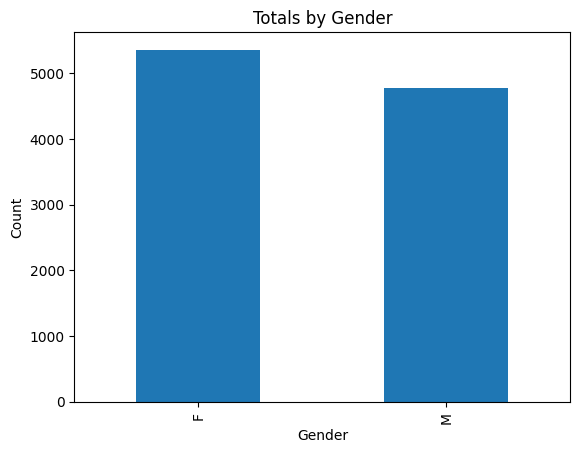

In [14]:
full_df['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Totals by Gender")

Text(0.5, 1.0, 'Totals by Age')

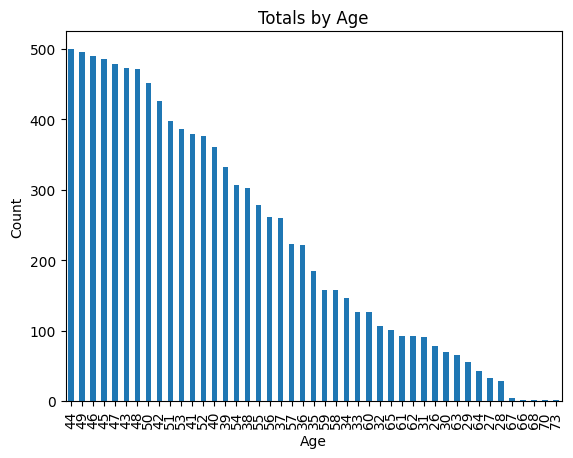

In [15]:
full_df['Customer_Age'].value_counts().plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Totals by Age")

Text(0.5, 1.0, 'Totals of Dependents per Person')

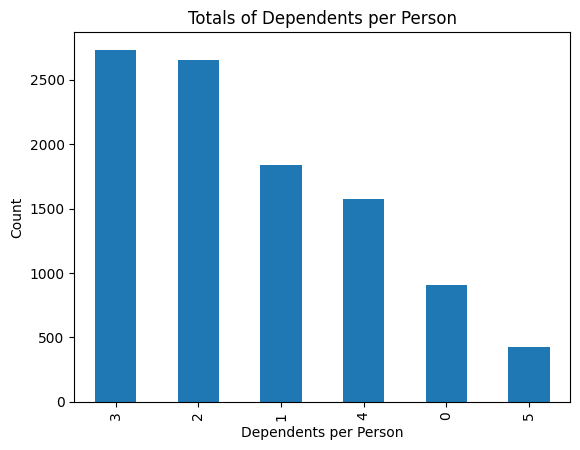

In [16]:
full_df['Dependent_count'].value_counts().plot(kind="bar")
plt.xlabel("Dependents per Person")
plt.ylabel("Count")
plt.title("Totals of Dependents per Person")

Text(0.5, 1.0, 'Totals by Education Level')

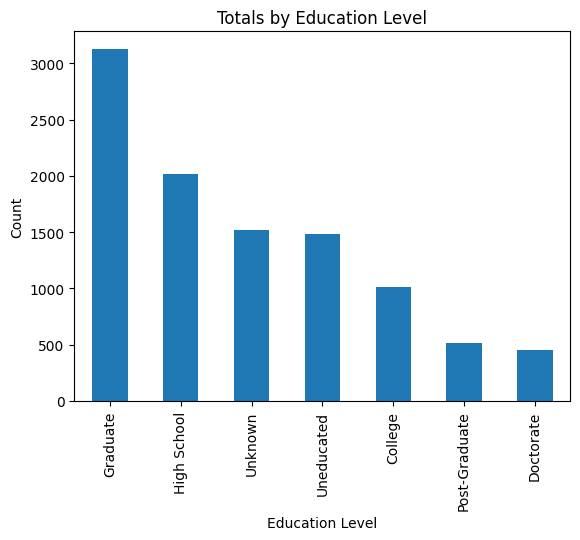

In [17]:
full_df['Education_Level'].value_counts().plot(kind="bar")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Totals by Education Level")

Text(0.5, 1.0, 'Totals by Marital Status')

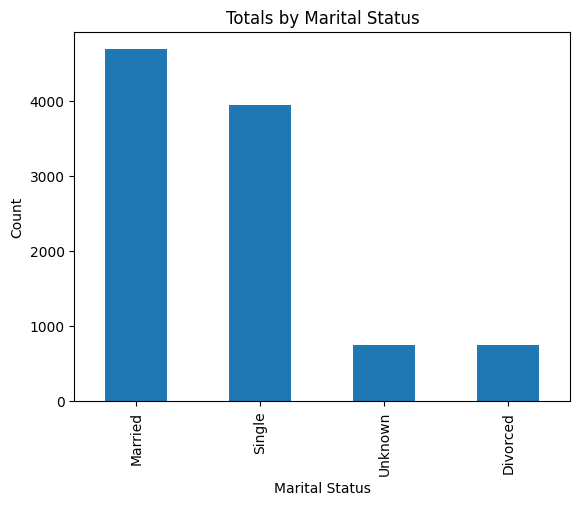

In [18]:
full_df['Marital_Status'].value_counts().plot(kind="bar")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Totals by Marital Status")

Text(0.5, 1.0, 'Totals by Income Category')

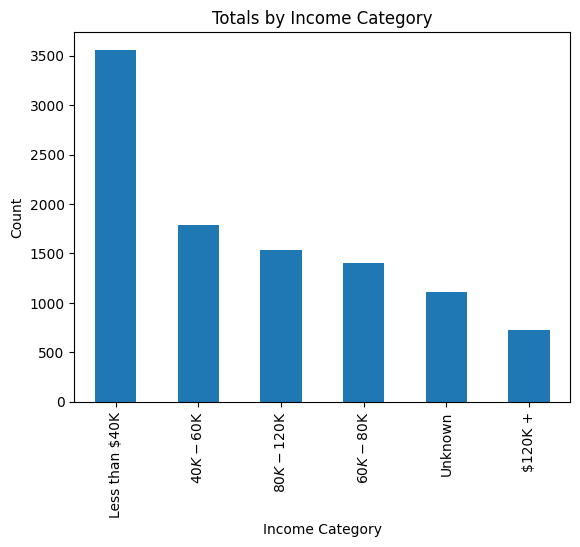

In [19]:
full_df['Income_Category'].value_counts().plot(kind="bar")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Totals by Income Category")

Text(0.5, 1.0, 'Totals by Card Category')

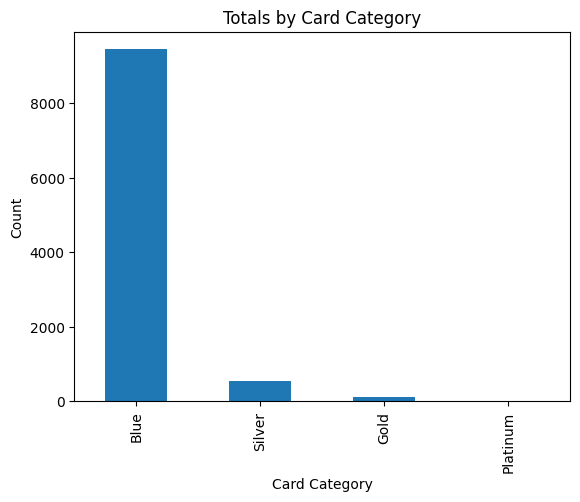

In [20]:
full_df['Card_Category'].value_counts().plot(kind="bar")
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.title("Totals by Card Category")

#### Credit Card Churn Drivers- Multivariable Analysis

In [21]:
agg_gender = full_df.groupby(['Marital_Status','Education_Level'])['Gender'].count().unstack()
agg_gender.head(5)

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Marital_Status,,,,,,,
Divorced,86,36,225,128,41,136,96
Married,467,205,1479,949,243,656,688
Single,386,182,1197,782,189,586,621
Unknown,74,28,227,154,43,109,114


<Axes: xlabel='Marital_Status'>

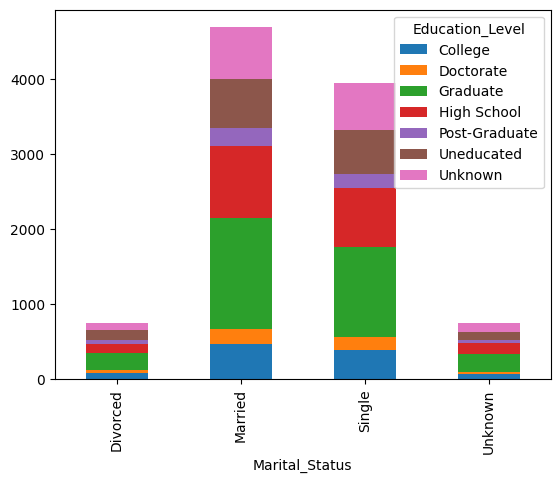

In [22]:
agg_gender.plot(kind="bar",stacked=True)

In [23]:
agg_customers = full_df.groupby(['Marital_Status','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers.drop("Unknown",axis=0)
agg_customers.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


<Axes: xlabel='Marital_Status'>

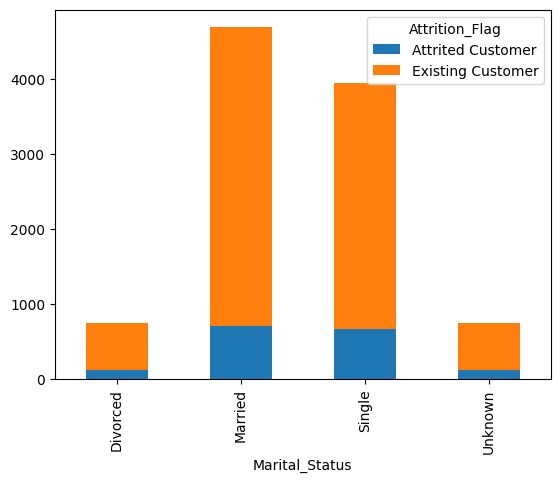

In [24]:
agg_customers.plot(kind="bar",stacked=True)

In [25]:
agg_customers2 = full_df.groupby(['Customer_Age','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers2.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Customer_Age,,
26,6.0,72.0
27,3.0,29.0
28,1.0,28.0
29,7.0,49.0
30,15.0,55.0


<Axes: xlabel='Customer_Age'>

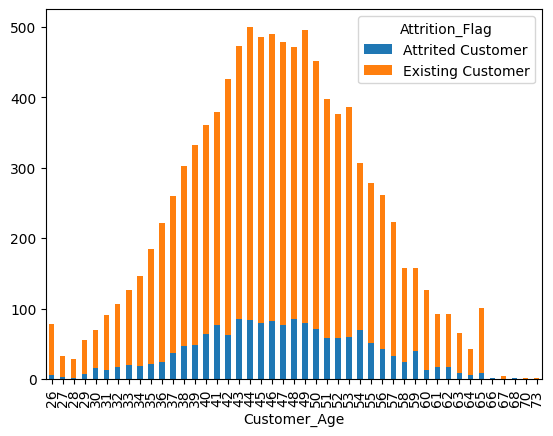

In [26]:
agg_customers2.plot(kind="bar",stacked=True)

###### The graph for age shows nearly a perfect bell curve without any normalization, this may indicate that age is a contributing factor to credit card turnover 

In [27]:
agg_customers3 = full_df.groupby(['Gender','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers3.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


<Axes: xlabel='Gender'>

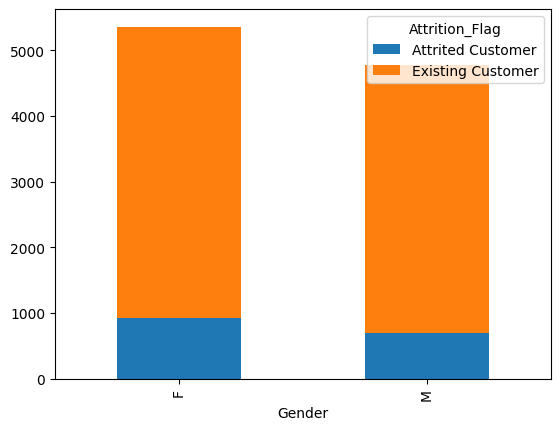

In [28]:
agg_customers3.plot(kind="bar",stacked=True)

In [29]:
agg_customers4 = full_df.groupby(['Dependent_count','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers4.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314


<Axes: xlabel='Dependent_count'>

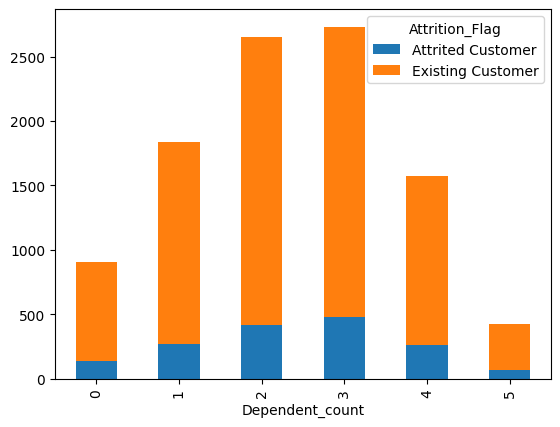

In [30]:
agg_customers4.plot(kind="bar",stacked=True)

In [31]:
agg_customers5 = full_df.groupby(['Education_Level','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers5.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424


<Axes: xlabel='Education_Level'>

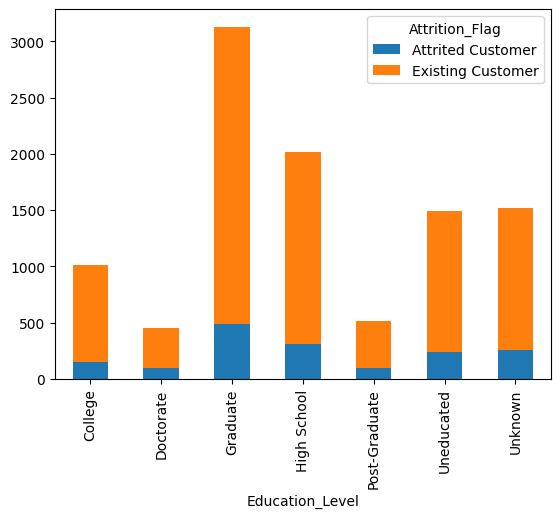

In [32]:
agg_customers5.plot(kind="bar",stacked=True)

In [33]:
agg_customers6 = full_df.groupby(['Income_Category','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers6.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949


<Axes: xlabel='Income_Category'>

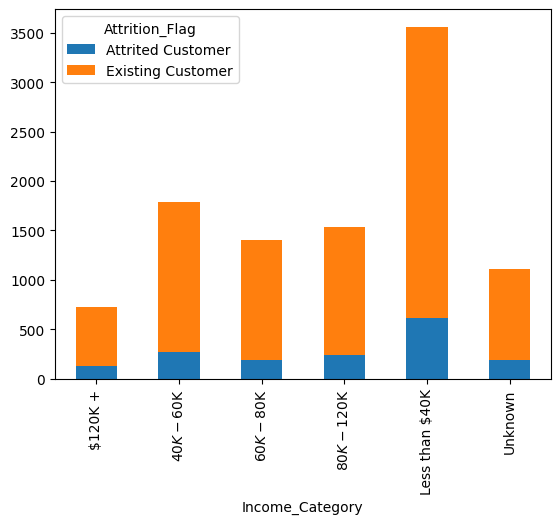

In [34]:
agg_customers6.plot(kind="bar",stacked=True)

In [35]:
agg_customers7 = full_df.groupby(['Card_Category','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers7.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


<Axes: xlabel='Card_Category'>

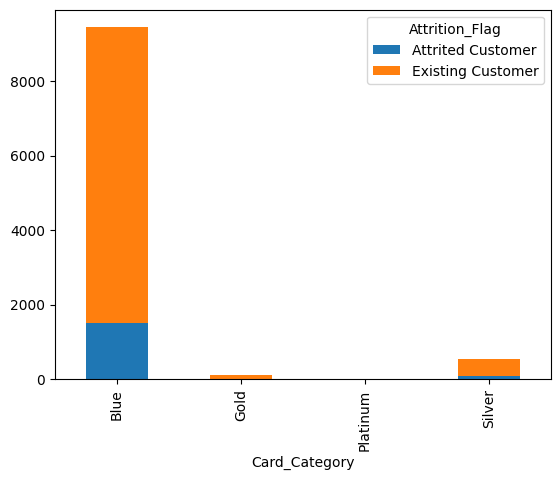

In [36]:
agg_customers7.plot(kind="bar",stacked=True)

In [37]:
agg_customers8 = full_df.groupby(['Months_on_book','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers8

Attrition_Flag,Attrited Customer,Existing Customer
Months_on_book,,
13,7,63
14,1,15
15,9,25
16,3,26
17,4,35
18,13,45
19,6,57
20,13,61
21,10,73


<Axes: xlabel='Months_on_book'>

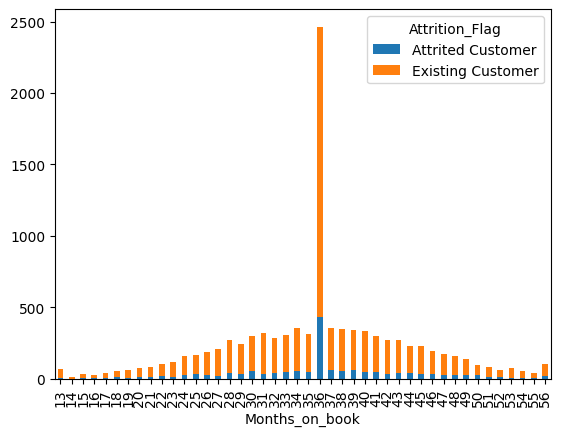

In [38]:
agg_customers8.plot(kind="bar",stacked=True)

In [39]:
agg_customers9 = full_df.groupby(['Total_Relationship_Count','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers9

Attrition_Flag,Attrited Customer,Existing Customer
Total_Relationship_Count,,
1,233,677
2,346,897
3,400,1905
4,225,1687
5,227,1664
6,196,1670


<Axes: xlabel='Total_Relationship_Count'>

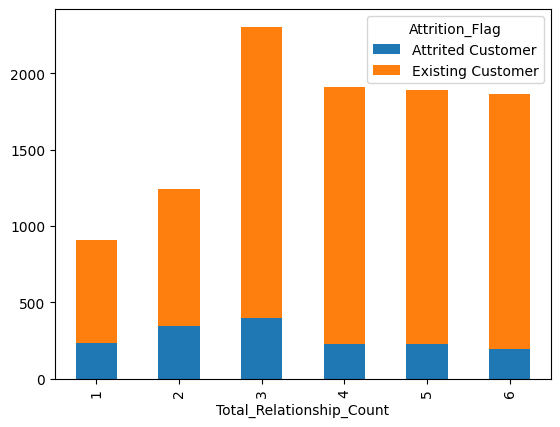

In [40]:
agg_customers9.plot(kind="bar",stacked=True)

Year 3(36 Month) Analysis 

There are signifigantly higher values of exisitng and attritied customers at the 3 year mark than in any other month_on_book value. We will explore if the trend from above true or if they based based on the high customer volume

In [41]:
year_3_df = full_df[full_df['Months_on_book'] == 36]
year_3_df.shape

(2463, 23)

In [42]:
agg_customers8_1 = year_3_df.groupby(['Months_on_book','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg_customers8_1

Attrition_Flag,Attrited Customer,Existing Customer
Months_on_book,,
36,430,2033


In [43]:
agg3_customers_1 = year_3_df.groupby(['Marital_Status','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_1.drop("Unknown",axis=0)
agg3_customers_1.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,29,159
Married,185,940
Single,184,774
Unknown,32,160


<Axes: xlabel='Marital_Status'>

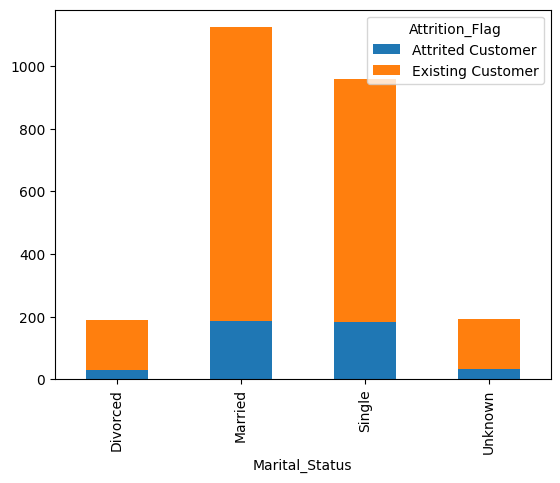

In [44]:
agg3_customers_1.plot(kind="bar",stacked=True)

In [45]:
agg3_customers_2 = year_3_df.groupby(['Customer_Age','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_2.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Customer_Age,,
26,NaN,16.0
27,1.0,7.0
28,1.0,8.0
29,2.0,14.0
30,6.0,10.0


<Axes: xlabel='Customer_Age'>

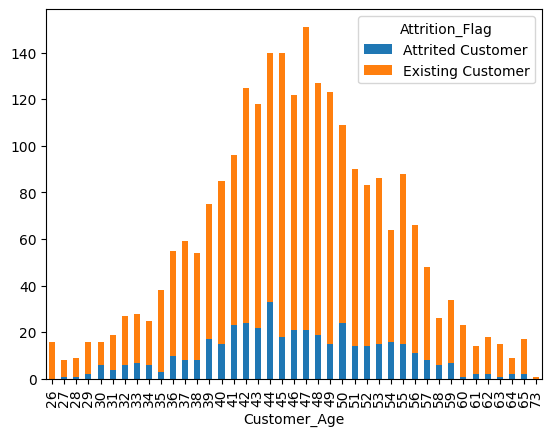

In [46]:
agg3_customers_2.plot(kind="bar",stacked=True)

In [47]:
agg3_customers_3 = year_3_df.groupby(['Gender','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_3.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,260,1104
M,170,929


<Axes: xlabel='Gender'>

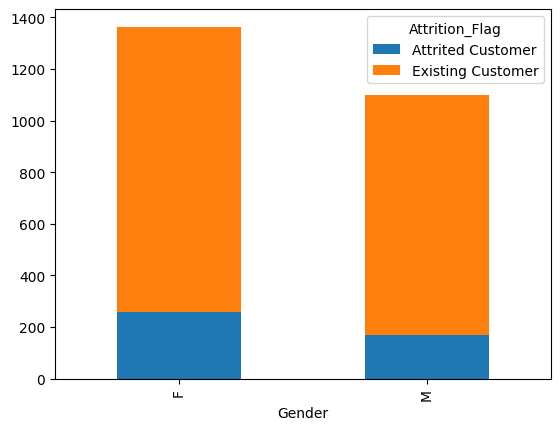

In [48]:
agg3_customers_3.plot(kind="bar",stacked=True)

In [49]:
agg3_customers_4 = year_3_df.groupby(['Dependent_count','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_4.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,23,194
1,78,338
2,106,506
3,136,555
4,71,354


<Axes: xlabel='Dependent_count'>

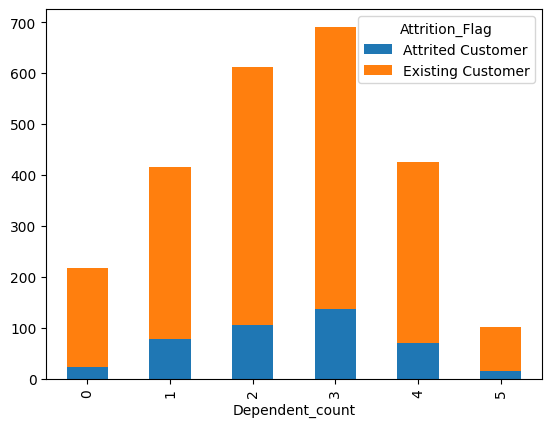

In [50]:
agg3_customers_4.plot(kind="bar",stacked=True)

In [51]:
agg3_customers_5 = year_3_df.groupby(['Education_Level','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_5.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,37,188
Doctorate,21,84
Graduate,134,595
High School,78,431
Post-Graduate,25,103


<Axes: xlabel='Education_Level'>

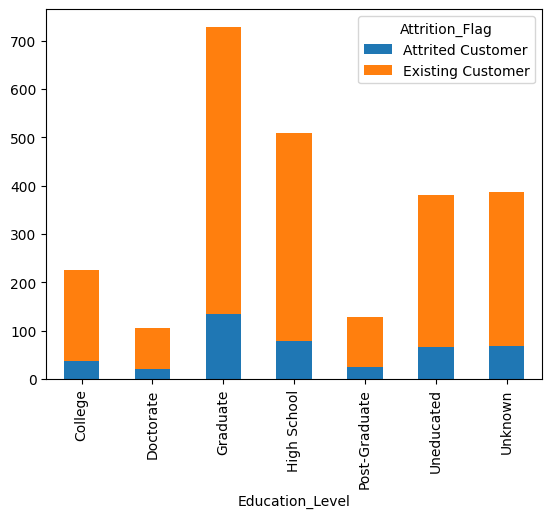

In [52]:
agg3_customers_5.plot(kind="bar",stacked=True)

In [53]:
agg3_customers_6 = year_3_df.groupby(['Income_Category','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_6.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,29,127
$40K - $60K,56,340
$60K - $80K,46,295
$80K - $120K,61,289
Less than $40K,191,753


<Axes: xlabel='Income_Category'>

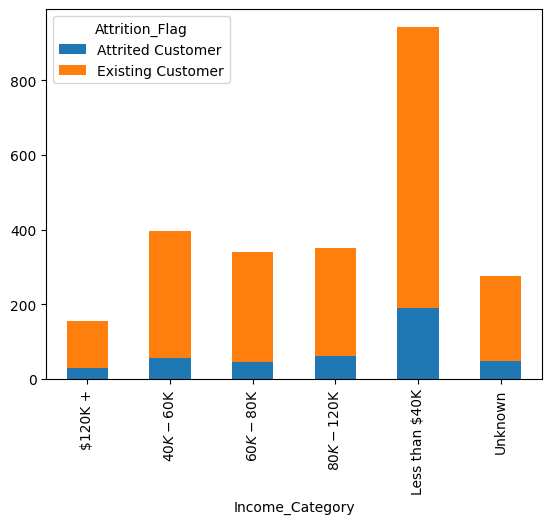

In [54]:
agg3_customers_6.plot(kind="bar",stacked=True)

In [55]:
agg3_customers_7 = year_3_df.groupby(['Card_Category','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_7.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,405.0,1888.0
Gold,8.0,27.0
Platinum,NaN,2.0
Silver,17.0,116.0


<Axes: xlabel='Card_Category'>

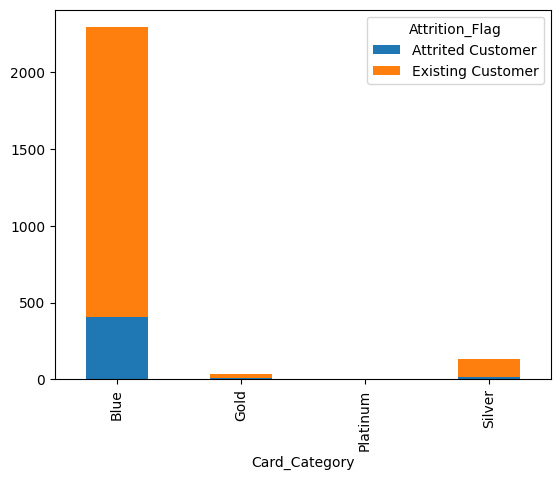

In [56]:
agg3_customers_7.plot(kind="bar",stacked=True)

In [57]:
agg3_customers_8 = year_3_df.groupby(['Total_Relationship_Count','Attrition_Flag'])['Attrition_Flag'].count().unstack()
agg3_customers_8.head(5)

Attrition_Flag,Attrited Customer,Existing Customer
Total_Relationship_Count,,
1,53,172
2,97,222
3,94,478
4,76,377
5,57,382


<Axes: xlabel='Total_Relationship_Count'>

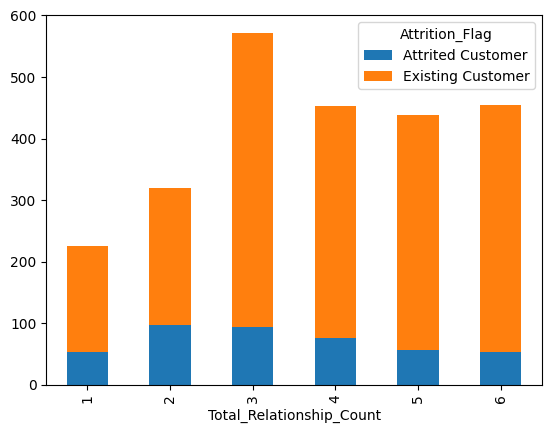

In [58]:
agg3_customers_8.plot(kind="bar",stacked=True)

#### Model Building
#### Cassie Kamens and Matt Werner
#### BAN/DAT Project 
#### Credit Card Customer Turnover

## One-Hot Encoding

In [59]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import io

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#### Train df encoding 

In [60]:
encode_DC=OneHotEncoder(sparse=False)
mat_DC=encode_DC.fit_transform(train_df["Dependent_count"].to_numpy().reshape(-1,1))
df_DC=pd.DataFrame(mat_DC,columns=encode_DC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
encode_EL=OneHotEncoder(sparse=False)
mat_EL=encode_EL.fit_transform(train_df["Education_Level"].to_numpy().reshape(-1,1))
df_EL=pd.DataFrame(mat_EL,columns=encode_EL.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
encode_MarS=OneHotEncoder(sparse=False)
mat_MarS=encode_MarS.fit_transform(train_df["Marital_Status"].to_numpy().reshape(-1,1))
df_MarS=pd.DataFrame(mat_MarS,columns=encode_MarS.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
encode_IC=OneHotEncoder(sparse=False)
mat_IC=encode_IC.fit_transform(train_df["Income_Category"].to_numpy().reshape(-1,1))
df_IC=pd.DataFrame(mat_IC,columns=encode_IC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
encode_CC=OneHotEncoder(sparse=False)
mat_CC=encode_CC.fit_transform(train_df["Card_Category"].to_numpy().reshape(-1,1))
df_CC=pd.DataFrame(mat_CC,columns=encode_CC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
encode_TRC=OneHotEncoder(sparse=False)
mat_TRC=encode_TRC.fit_transform(train_df["Total_Relationship_Count"].to_numpy().reshape(-1,1))
df_TRC=pd.DataFrame(mat_TRC,columns=encode_TRC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
df_cats=pd.concat([df_DC,df_EL,df_MarS,df_IC,df_CC,df_TRC], axis=1)
df_cats

,0,1,2,3,4,5,College,Doctorate,Graduate,High School,...,Blue,Gold,Platinum,Silver,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8099,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Train df Standard Scaling

In [67]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [68]:
credit_train_continuous= num_pipeline.fit_transform(train_df[['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])
credit_train_continuous=pd.DataFrame(credit_train_continuous,columns=['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

#### Combining Train DF

In [69]:
credit_train_final=pd.concat([credit_train_continuous,df_cats],axis=1)

#### Test Encoding

In [70]:
encode_DC=OneHotEncoder(sparse=False)
mat_DC=encode_DC.fit_transform(test_df["Dependent_count"].to_numpy().reshape(-1,1))
df_DC1=pd.DataFrame(mat_DC,columns=encode_DC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
encode_EL=OneHotEncoder(sparse=False)
mat_EL=encode_EL.fit_transform(test_df["Education_Level"].to_numpy().reshape(-1,1))
df_EL1=pd.DataFrame(mat_EL,columns=encode_EL.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
encode_MarS=OneHotEncoder(sparse=False)
mat_MarS=encode_MarS.fit_transform(test_df["Marital_Status"].to_numpy().reshape(-1,1))
df_MarS1=pd.DataFrame(mat_MarS,columns=encode_MarS.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
encode_IC=OneHotEncoder(sparse=False)
mat_IC=encode_IC.fit_transform(test_df["Income_Category"].to_numpy().reshape(-1,1))
df_IC1=pd.DataFrame(mat_IC,columns=encode_IC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
encode_CC=OneHotEncoder(sparse=False)
mat_CC=encode_CC.fit_transform(test_df["Card_Category"].to_numpy().reshape(-1,1))
df_CC1=pd.DataFrame(mat_CC,columns=encode_CC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
encode_TRC=OneHotEncoder(sparse=False)
mat_TRC=encode_TRC.fit_transform(test_df["Total_Relationship_Count"].to_numpy().reshape(-1,1))
df_TRC1=pd.DataFrame(mat_TRC,columns=encode_TRC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
df_cats1=pd.concat([df_DC1,df_EL1,df_MarS1,df_IC1,df_CC1,df_TRC1], axis=1)
df_cats1

,0,1,2,3,4,5,College,Doctorate,Graduate,High School,...,Blue,Gold,Platinum,Silver,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Test Standard Scale

In [77]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [78]:
credit_test_continuous= num_pipeline.fit_transform(test_df[['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])
credit_test_continuous=pd.DataFrame(credit_train_continuous,columns=['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

#### Combine Test DF

In [79]:
credit_test_final=pd.concat([credit_test_continuous,df_cats1],axis=1)

#### Dataframe Name Assignment

In [80]:
y_train = train_df['Attrition_Flag']

In [81]:
x_train = credit_train_final

In [82]:
y_test = credit_test_final

## Nueral Net Model 

In [83]:
x_train_2, x_valid, y_train_2, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [84]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf.fit(x_train.values, y_train)

Iteration 1, loss = 0.82437930
Iteration 2, loss = 0.57053952
Iteration 3, loss = 0.40976960
Iteration 4, loss = 0.35473659
Iteration 5, loss = 0.32713875
Iteration 6, loss = 0.30691569
Iteration 7, loss = 0.29180051
Iteration 8, loss = 0.28028384
Iteration 9, loss = 0.27063453
Iteration 10, loss = 0.26194964
Iteration 11, loss = 0.25238577
Iteration 12, loss = 0.24262381
Iteration 13, loss = 0.23410703
Iteration 14, loss = 0.22693102
Iteration 15, loss = 0.22054647
Iteration 16, loss = 0.21536234
Iteration 17, loss = 0.21035173
Iteration 18, loss = 0.20592130
Iteration 19, loss = 0.20202007
Iteration 20, loss = 0.19794963
Iteration 21, loss = 0.19450630
Iteration 22, loss = 0.19025027
Iteration 23, loss = 0.18592864
Iteration 24, loss = 0.18212309
Iteration 25, loss = 0.17852366
Iteration 26, loss = 0.17503003
Iteration 27, loss = 0.17184741
Iteration 28, loss = 0.16931170
Iteration 29, loss = 0.16585240
Iteration 30, loss = 0.16298356
Iteration 31, loss = 0.16030565
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6), max_iter=500,
              random_state=1, verbose=True)

#### Model Preformance

In [85]:
clf1 = clf.fit(x_train_2.values, y_train_2)
y_pred = clf1.predict(x_valid.values)

print (accuracy_score(y_valid,y_pred))

neur_acc = accuracy_score(y_valid,y_pred)

Iteration 1, loss = 0.85200691
Iteration 2, loss = 0.64191049
Iteration 3, loss = 0.47178023
Iteration 4, loss = 0.38691198
Iteration 5, loss = 0.35244516
Iteration 6, loss = 0.33031718
Iteration 7, loss = 0.31262667
Iteration 8, loss = 0.29850026
Iteration 9, loss = 0.28719428
Iteration 10, loss = 0.27775879
Iteration 11, loss = 0.26897140
Iteration 12, loss = 0.26037345
Iteration 13, loss = 0.25142626
Iteration 14, loss = 0.24323989
Iteration 15, loss = 0.23617350
Iteration 16, loss = 0.22956324
Iteration 17, loss = 0.22413273
Iteration 18, loss = 0.21936960
Iteration 19, loss = 0.21515701
Iteration 20, loss = 0.21129857
Iteration 21, loss = 0.20742814
Iteration 22, loss = 0.20415274
Iteration 23, loss = 0.20062118
Iteration 24, loss = 0.19726144
Iteration 25, loss = 0.19434877
Iteration 26, loss = 0.19086401
Iteration 27, loss = 0.18770145
Iteration 28, loss = 0.18439638
Iteration 29, loss = 0.18089330
Iteration 30, loss = 0.17757810
Iteration 31, loss = 0.17534963
Iteration 32, los

### Permutation Importance

In [86]:
!pip install eli5
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=887f6a15ad2d74063615f41175c94ac3d2d4bde16ce8e13df6d3f38417fb9440
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 22.5 MB/s eta 0:00:00


In [87]:
import eli5
from eli5.sklearn import PermutationImportance

In [88]:
features = ['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1','0-DC','1-DC','2-DC','3-DC','4-DC','5-DC','College','Doctorate','Graduate','High School','Post-Graduate','Uneducated','Unknown','Divorced','Married','Single','Unknown','$120K +','$40K - $60K','$60K - $80K','$80K - $120K','Less than $40K','Unknown','Blue','Gold','Platinum','Silver','1','2','3','4','5','6']
features

['Months_on_book',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 '0-DC',
 '1-DC',
 '2-DC',
 '3-DC',
 '4-DC',
 '5-DC',
 'College',
 'Doctorate',
 'Graduate',
 'High School',
 'Post-Graduate',
 'Uneducated',
 'Unknown',
 'Divorced',
 'Married',
 'Single',
 'Unknown',
 '$120K +',
 '$40K - $60K',
 '$60K - $80K',
 '$80K - $120K',
 'Less than $40K',
 'Unknown',
 'Blue',
 'Gold',
 'Platinum',
 'Silver',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6']

In [89]:
perm = PermutationImportance(clf, random_state=1).fit(x_train.values, y_train)

In [90]:
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.2651 ± 0.0124,Total_Trans_Ct
0.1347 ± 0.0061,Total_Trans_Amt
0.0476 ± 0.0025,Total_Revolving_Bal
0.0343 ± 0.0022,Total_Ct_Chng_Q4_Q1
0.0325 ± 0.0032,6
0.0268 ± 0.0030,5
0.0258 ± 0.0028,4
0.0249 ± 0.0018,Months_Inactive_12_mon
0.0209 ± 0.0018,Credit_Limit
0.0199 ± 0.0024,Total_Amt_Chng_Q4_Q1


### KNN Model

In [91]:
import sklearn
from sklearn import neighbors

kncf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

kn2 = kncf.fit(x_train.values, y_train)

Model Importance

In [92]:
kn3 = kncf.fit(x_train_2.values, y_train_2)
y_pred = kn3.predict(x_valid.values)

print (accuracy_score(y_valid,y_pred))

knn_acc = accuracy_score(y_valid,y_pred)

0.9086983343615053


Feature Importance

In [93]:
perm_kncf = PermutationImportance(kncf, random_state=1).fit(x_train.values, y_train)

In [94]:
eli5.show_weights(perm_kncf, feature_names = features)

Weight,Feature
0.0500 ± 0.0038,Total_Trans_Ct
0.0334 ± 0.0032,Total_Revolving_Bal
0.0206 ± 0.0034,Total_Ct_Chng_Q4_Q1
0.0130 ± 0.0033,Total_Trans_Amt
0.0119 ± 0.0023,Months_Inactive_12_mon
0.0086 ± 0.0014,Months_on_book
0.0083 ± 0.0020,Total_Amt_Chng_Q4_Q1
0.0060 ± 0.0027,Contacts_Count_12_mon
0.0046 ± 0.0016,Credit_Limit
0.0035 ± 0.0010,Avg_Open_To_Buy


## Linear Model

In [95]:
import sklearn 
from sklearn import linear_model

lin = sklearn.linear_model.SGDClassifier(penalty='l2',alpha=0.0001)
lin2 = lin.fit(x_train.values,y_train)

Model Importance

In [96]:
lin3 = lin.fit(x_train_2.values, y_train_2)
y_pred = lin3.predict(x_valid.values)

print (accuracy_score(y_valid,y_pred))

lin_acc = accuracy_score(y_valid,y_pred)

0.905613818630475


Feature Importance

In [97]:
perm_lin = PermutationImportance(lin, random_state=1).fit(x_train.values, y_train)

In [98]:
eli5.show_weights(perm_lin, feature_names = features)

Weight,Feature
0.1722 ± 0.0061,Total_Trans_Ct
0.0511 ± 0.0030,Total_Trans_Amt
0.0295 ± 0.0041,Total_Revolving_Bal
0.0210 ± 0.0027,2
0.0187 ± 0.0022,Total_Ct_Chng_Q4_Q1
0.0158 ± 0.0025,Contacts_Count_12_mon
0.0153 ± 0.0035,Less than $40K
0.0147 ± 0.0021,1
0.0136 ± 0.0042,Single
0.0092 ± 0.0032,Months_Inactive_12_mon


## Random Forest

In [99]:
!pip install deslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 9.3 MB/s eta 0:00:00


In [100]:
from sklearn.ensemble import RandomForestClassifier
from deslib.des.knora_e import KNORAE
pool_classifiers = RandomForestClassifier(n_estimators=10)

Model Importance

In [101]:
pool_classifiers.fit(x_train_2.values, y_train_2)
knorae = KNORAE(pool_classifiers)
knorae.fit(x_train_2.values, y_train_2)
y_pred_kn=knorae.predict(x_valid.values)
print (accuracy_score(y_valid,y_pred_kn))

ran_for_acc = accuracy_score(y_valid,y_pred_kn)

0.9426280074028378


Feature Importance

In [102]:
perm_kon = PermutationImportance(knorae, random_state=1).fit(x_train.values, y_train)

In [103]:
eli5.show_weights(perm_kon, feature_names = features)

Weight,Feature
0.1164 ± 0.0058,Total_Trans_Ct
0.0723 ± 0.0023,Total_Trans_Amt
0.0325 ± 0.0017,Total_Revolving_Bal
0.0234 ± 0.0022,Total_Ct_Chng_Q4_Q1
0.0106 ± 0.0022,1
0.0096 ± 0.0013,2
0.0086 ± 0.0020,Total_Amt_Chng_Q4_Q1
0.0067 ± 0.0012,Contacts_Count_12_mon
0.0037 ± 0.0023,Months_Inactive_12_mon
0.0026 ± 0.0005,Months_on_book


## Logistic Model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

log = LogisticRegression()
log.fit(x_train.values, y_train)

LogisticRegression()

Model Importance

In [105]:
log2 = log.fit(x_train_2.values, y_train_2)
y_pred = log2.predict(x_valid.values)

print (accuracy_score(y_valid,y_pred))

log_acc = accuracy_score(y_valid,y_pred)

0.9080814312152992


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Importance

In [106]:
perm_log = PermutationImportance(log, random_state=1).fit(x_train.values, y_train)

In [107]:
eli5.show_weights(perm_log, feature_names = features)

Weight,Feature
0.1757 ± 0.0078,Total_Trans_Ct
0.0565 ± 0.0055,Total_Trans_Amt
0.0249 ± 0.0042,Total_Revolving_Bal
0.0165 ± 0.0037,Total_Ct_Chng_Q4_Q1
0.0107 ± 0.0012,Contacts_Count_12_mon
0.0093 ± 0.0029,2
0.0081 ± 0.0014,Months_Inactive_12_mon
0.0062 ± 0.0012,1
0.0034 ± 0.0019,5
0.0032 ± 0.0022,4


## ADA Boosted Model

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

Model and Model Importance

In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=3000,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train.values, y_train)

y_pred=ada_clf.predict(x_valid.values)

print (accuracy_score(y_valid,y_pred))

ada_acc = accuracy_score(y_valid,y_pred)

0.9796421961752005


Feature Imporatnce

Do not run this again

In [110]:
#perm_ada = PermutationImportance(ada_clf, random_state=1).fit(x_train.values, y_train)

In [111]:
#eli5.show_weights(perm_ada, feature_names = features)

## Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1, max_depth=1)

Model Importance

In [113]:
gb_clf.fit(x_train.values, y_train)

y_pred_gb = gb_clf.predict(x_valid.values)
print (accuracy_score(y_valid,y_pred))

grad_acc = accuracy_score(y_valid,y_pred)

0.9796421961752005


Feature Importance

In [114]:
perm_grad = PermutationImportance(gb_clf, random_state=1).fit(x_train.values, y_train)

In [115]:
eli5.show_weights(perm_grad, feature_names = features)

Weight,Feature
0.0769 ± 0.0080,Total_Trans_Ct
0.0469 ± 0.0027,Total_Revolving_Bal
0.0178 ± 0.0024,Total_Trans_Amt
0.0153 ± 0.0019,Total_Ct_Chng_Q4_Q1
0.0053 ± 0.0019,Months_Inactive_12_mon
0.0023 ± 0.0010,Contacts_Count_12_mon
0.0022 ± 0.0006,Total_Amt_Chng_Q4_Q1
0.0010 ± 0.0008,2
0.0002 ± 0.0003,1
0 ± 0.0000,3-DC


## Model Ranking 

In [116]:
models = pd.DataFrame({
    'Model': ['clf','KNN','Linear','Random Forest','Logistic','Ada Boost','Gradient Boost'],
    'Score': [neur_acc, knn_acc, lin_acc, ran_for_acc,log_acc,ada_acc,grad_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Ada Boost,0.979642
6,Gradient Boost,0.979642
3,Random Forest,0.942628
0,clf,0.924738
1,KNN,0.908698
4,Logistic,0.908081
2,Linear,0.905614


## Demographic Only Model



#### One-Hot Encode Dependent Count, Education Level, and Marital Status

In [117]:
encode_DC=OneHotEncoder(sparse=False)
mat_DC=encode_DC.fit_transform(train_df["Dependent_count"].to_numpy().reshape(-1,1))
df_DC0=pd.DataFrame(mat_DC,columns=encode_DC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
encode_EL=OneHotEncoder(sparse=False)
mat_EL=encode_EL.fit_transform(train_df["Education_Level"].to_numpy().reshape(-1,1))
df_EL0=pd.DataFrame(mat_EL,columns=encode_EL.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
encode_MarS=OneHotEncoder(sparse=False)
mat_MarS=encode_MarS.fit_transform(train_df["Marital_Status"].to_numpy().reshape(-1,1))
df_MarS0=pd.DataFrame(mat_MarS,columns=encode_MarS.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [120]:
credit_train_final_1 = pd.concat([df_DC0,df_EL0,df_MarS0], axis=1)

In [121]:
encode_DC=OneHotEncoder(sparse=False)
mat_DC=encode_DC.fit_transform(test_df["Dependent_count"].to_numpy().reshape(-1,1))
df_DC3=pd.DataFrame(mat_DC,columns=encode_DC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [122]:
encode_EL=OneHotEncoder(sparse=False)
mat_EL=encode_EL.fit_transform(test_df["Education_Level"].to_numpy().reshape(-1,1))
df_EL3=pd.DataFrame(mat_EL,columns=encode_EL.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [123]:
encode_MarS=OneHotEncoder(sparse=False)
mat_MarS=encode_MarS.fit_transform(test_df["Marital_Status"].to_numpy().reshape(-1,1))
df_MarS3=pd.DataFrame(mat_MarS,columns=encode_MarS.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [124]:
credit_test_final_1 = pd.concat([df_DC3,df_EL3,df_MarS3], axis=1)

In [125]:
y_train = train_df['Attrition_Flag']

In [126]:
x_train = credit_train_final_1

In [127]:
y_test = credit_test_final_1

#### Classifier 

In [128]:
x_train_DO, x_valid_DO, y_train_DO, y_valid_DO = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [129]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf.fit(x_train.values, y_train)

Iteration 1, loss = 0.80027409
Iteration 2, loss = 0.61880584
Iteration 3, loss = 0.50801749
Iteration 4, loss = 0.45585841
Iteration 5, loss = 0.44542038
Iteration 6, loss = 0.44198143
Iteration 7, loss = 0.43980868
Iteration 8, loss = 0.43811269
Iteration 9, loss = 0.43687784
Iteration 10, loss = 0.43611253
Iteration 11, loss = 0.43557105
Iteration 12, loss = 0.43513389
Iteration 13, loss = 0.43480233
Iteration 14, loss = 0.43457042
Iteration 15, loss = 0.43451664
Iteration 16, loss = 0.43437607
Iteration 17, loss = 0.43408704
Iteration 18, loss = 0.43406832
Iteration 19, loss = 0.43398498
Iteration 20, loss = 0.43392707
Iteration 21, loss = 0.43376747
Iteration 22, loss = 0.43372320
Iteration 23, loss = 0.43367660
Iteration 24, loss = 0.43366583
Iteration 25, loss = 0.43366159
Iteration 26, loss = 0.43350069
Iteration 27, loss = 0.43347019
Iteration 28, loss = 0.43332710
Iteration 29, loss = 0.43334483
Iteration 30, loss = 0.43332662
Iteration 31, loss = 0.43322090
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6), max_iter=500,
              random_state=1, verbose=True)

In [130]:
clf1 = clf.fit(x_train_DO.values, y_train_DO)
y_pred = clf1.predict(x_valid_DO.values)

print (accuracy_score(y_valid_DO,y_pred))

neur_acc = accuracy_score(y_valid_DO,y_pred)

Iteration 1, loss = 0.82326437
Iteration 2, loss = 0.66103642
Iteration 3, loss = 0.55279586
Iteration 4, loss = 0.48053609
Iteration 5, loss = 0.44988792
Iteration 6, loss = 0.44297358
Iteration 7, loss = 0.44026473
Iteration 8, loss = 0.43841214
Iteration 9, loss = 0.43705377
Iteration 10, loss = 0.43577640
Iteration 11, loss = 0.43494056
Iteration 12, loss = 0.43416903
Iteration 13, loss = 0.43372688
Iteration 14, loss = 0.43332127
Iteration 15, loss = 0.43302605
Iteration 16, loss = 0.43279832
Iteration 17, loss = 0.43268397
Iteration 18, loss = 0.43237297
Iteration 19, loss = 0.43212793
Iteration 20, loss = 0.43207135
Iteration 21, loss = 0.43197906
Iteration 22, loss = 0.43183857
Iteration 23, loss = 0.43174031
Iteration 24, loss = 0.43169772
Iteration 25, loss = 0.43165963
Iteration 26, loss = 0.43152358
Iteration 27, loss = 0.43148040
Iteration 28, loss = 0.43149856
Iteration 29, loss = 0.43144071
Iteration 30, loss = 0.43139084
Iteration 31, loss = 0.43138180
Iteration 32, los

#### Permutation Importance

In [131]:
features = ['0-DC','1-DC','2-DC','3-DC','4-DC','5-DC','College','Doctorate','Graduate','High School','Post-Graduate','Uneducated','Unknown','Divorced','Married','Single','Unknown']
features

['0-DC',
 '1-DC',
 '2-DC',
 '3-DC',
 '4-DC',
 '5-DC',
 'College',
 'Doctorate',
 'Graduate',
 'High School',
 'Post-Graduate',
 'Uneducated',
 'Unknown',
 'Divorced',
 'Married',
 'Single',
 'Unknown']

In [132]:
perm = PermutationImportance(clf, random_state=1).fit(x_train_DO.values, y_train_DO)

In [133]:
eli5.show_weights(perm, feature_names = features)

/usr/local/lib/python3.10/dist-packages/eli5/formatters/html.py:233: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,Unknown
0 ± 0.0000,Doctorate
0 ± 0.0000,1-DC
0 ± 0.0000,2-DC
0 ± 0.0000,3-DC
0 ± 0.0000,4-DC
0 ± 0.0000,5-DC
0 ± 0.0000,College
0 ± 0.0000,Graduate
0 ± 0.0000,Single


## Year 3 Classifier 

In [134]:
MOB_36 = pd.DataFrame(train_df.where(train_df['Months_on_book'] == 36)).dropna()
MOB_36.head()
MOB_36.shape

(1968, 20)

In [135]:
encode_DC=OneHotEncoder(sparse=False)
mat_DC=encode_DC.fit_transform(MOB_36["Dependent_count"].to_numpy().reshape(-1,1))
df_DC_36=pd.DataFrame(mat_DC,columns=encode_DC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [136]:
encode_EL=OneHotEncoder(sparse=False)
mat_EL=encode_EL.fit_transform(MOB_36["Education_Level"].to_numpy().reshape(-1,1))
df_EL_36=pd.DataFrame(mat_EL,columns=encode_EL.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [137]:
encode_MarS=OneHotEncoder(sparse=False)
mat_MarS=encode_MarS.fit_transform(MOB_36["Marital_Status"].to_numpy().reshape(-1,1))
df_MarS_36=pd.DataFrame(mat_MarS,columns=encode_MarS.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [138]:
encode_IC=OneHotEncoder(sparse=False)
mat_IC=encode_IC.fit_transform(MOB_36["Income_Category"].to_numpy().reshape(-1,1))
df_IC_36=pd.DataFrame(mat_IC,columns=encode_IC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [139]:
encode_CC=OneHotEncoder(sparse=False)
mat_CC=encode_CC.fit_transform(MOB_36["Card_Category"].to_numpy().reshape(-1,1))
df_CC_36=pd.DataFrame(mat_CC,columns=encode_CC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
encode_TRC=OneHotEncoder(sparse=False)
mat_TRC=encode_TRC.fit_transform(MOB_36["Total_Relationship_Count"].to_numpy().reshape(-1,1))
df_TRC_36=pd.DataFrame(mat_TRC,columns=encode_TRC.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [141]:
df_cats_36=pd.concat([df_DC_36,df_EL_36,df_MarS_36,df_IC_36,df_CC_36, df_TRC_36], axis=1)
df_cats_36

,0.0,1.0,2.0,3.0,4.0,5.0,College,Doctorate,Graduate,High School,...,Blue,Gold,Platinum,Silver,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1964,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1966,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [142]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [143]:
credit_test_continuous_36= num_pipeline.fit_transform(MOB_36[['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])
credit_test_continuous_36_1=pd.DataFrame(credit_test_continuous_36,columns=['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

In [144]:
credit_test_final_36=pd.concat([credit_test_continuous_36_1,df_cats_36],axis=1)
credit_test_final_36.shape

(1968, 43)

In [145]:
y_train_36 = MOB_36['Attrition_Flag']

In [146]:
x_train_36 = credit_test_final_36

In [147]:
x_train_36, x_valid_36, y_train_36, y_valid_36 = train_test_split(x_train_36, y_train_36, test_size=0.2, random_state=42)

In [148]:
from sklearn.neural_network import MLPClassifier
clf_36 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf_36.fit(x_train_36.values, y_train_36)

Iteration 1, loss = 0.92454028
Iteration 2, loss = 0.87314530
Iteration 3, loss = 0.82253902
Iteration 4, loss = 0.77002823
Iteration 5, loss = 0.71873275
Iteration 6, loss = 0.66882048
Iteration 7, loss = 0.62038988
Iteration 8, loss = 0.57366061
Iteration 9, loss = 0.53093033
Iteration 10, loss = 0.49203490
Iteration 11, loss = 0.45931358
Iteration 12, loss = 0.43113036
Iteration 13, loss = 0.40989931
Iteration 14, loss = 0.39288107
Iteration 15, loss = 0.37973219
Iteration 16, loss = 0.36952136
Iteration 17, loss = 0.36055215
Iteration 18, loss = 0.35281529
Iteration 19, loss = 0.34601094
Iteration 20, loss = 0.33976356
Iteration 21, loss = 0.33399185
Iteration 22, loss = 0.32856950
Iteration 23, loss = 0.32381423
Iteration 24, loss = 0.31919508
Iteration 25, loss = 0.31505865
Iteration 26, loss = 0.31100610
Iteration 27, loss = 0.30724233
Iteration 28, loss = 0.30370689
Iteration 29, loss = 0.30026182
Iteration 30, loss = 0.29721622
Iteration 31, loss = 0.29415134
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6), max_iter=500,
              random_state=1, verbose=True)

NameError: ignored

In [149]:
clf1 = clf_36.fit(x_train_36.values, y_train_36)
y_pred = clf1.predict(x_valid_36.values)

print (accuracy_score(y_valid_36,y_pred))

neur_acc = accuracy_score(y_valid_36,y_pred)

Iteration 1, loss = 0.92454028
Iteration 2, loss = 0.87314530
Iteration 3, loss = 0.82253902
Iteration 4, loss = 0.77002823
Iteration 5, loss = 0.71873275
Iteration 6, loss = 0.66882048
Iteration 7, loss = 0.62038988
Iteration 8, loss = 0.57366061
Iteration 9, loss = 0.53093033
Iteration 10, loss = 0.49203490
Iteration 11, loss = 0.45931358
Iteration 12, loss = 0.43113036
Iteration 13, loss = 0.40989931
Iteration 14, loss = 0.39288107
Iteration 15, loss = 0.37973219
Iteration 16, loss = 0.36952136
Iteration 17, loss = 0.36055215
Iteration 18, loss = 0.35281529
Iteration 19, loss = 0.34601094
Iteration 20, loss = 0.33976356
Iteration 21, loss = 0.33399185
Iteration 22, loss = 0.32856950
Iteration 23, loss = 0.32381423
Iteration 24, loss = 0.31919508
Iteration 25, loss = 0.31505865
Iteration 26, loss = 0.31100610
Iteration 27, loss = 0.30724233
Iteration 28, loss = 0.30370689
Iteration 29, loss = 0.30026182
Iteration 30, loss = 0.29721622
Iteration 31, loss = 0.29415134
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [150]:
import eli5
from eli5.sklearn import PermutationImportance

In [151]:
features = ['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1','0-DC','1-DC','2-DC','3-DC','4-DC','5-DC','College','Doctorate','Graduate','High School','Post-Graduate','Uneducated','Unknown','Divorced','Married','Single','Unknown','$120K +','$40K - $60K','$60K - $80K','$80K - $120K','Less than $40K','Unknown','Blue','Gold','Platinum','Silver','1','2','3','4','5','6']
features

['Months_on_book',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 '0-DC',
 '1-DC',
 '2-DC',
 '3-DC',
 '4-DC',
 '5-DC',
 'College',
 'Doctorate',
 'Graduate',
 'High School',
 'Post-Graduate',
 'Uneducated',
 'Unknown',
 'Divorced',
 'Married',
 'Single',
 'Unknown',
 '$120K +',
 '$40K - $60K',
 '$60K - $80K',
 '$80K - $120K',
 'Less than $40K',
 'Unknown',
 'Blue',
 'Gold',
 'Platinum',
 'Silver',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6']

In [152]:
perm = PermutationImportance(clf_36, random_state=1).fit(x_train_36.values, y_train_36)

In [153]:
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.2759 ± 0.0158,Total_Trans_Ct
0.1488 ± 0.0038,Total_Trans_Amt
0.0748 ± 0.0085,Total_Revolving_Bal
0.0653 ± 0.0060,Total_Ct_Chng_Q4_Q1
0.0537 ± 0.0047,Months_Inactive_12_mon
0.0332 ± 0.0041,3
0.0285 ± 0.0060,4
0.0278 ± 0.0054,6
0.0274 ± 0.0044,Contacts_Count_12_mon
0.0260 ± 0.0032,Total_Amt_Chng_Q4_Q1


#### Correlation Matrix

In [154]:
encode_AF=OneHotEncoder(sparse=False)
mat_AF=encode_AF.fit_transform(MOB_36["Attrition_Flag"].to_numpy().reshape(-1,1))
df_AF_36=pd.DataFrame(mat_AF,columns=encode_AF.categories_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [155]:
df_cats_CM_36=pd.concat([df_DC_36,df_EL_36,df_MarS_36,df_IC_36,df_CC_36,df_TRC_36,df_AF_36], axis=1)

In [156]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [157]:
credit_train_continuous_36= num_pipeline.fit_transform(train_df[['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])
credit_train_continuous_36= pd.DataFrame(credit_train_continuous,columns=['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

In [158]:
correlation_train_final_36=pd.concat([credit_train_continuous_36,df_cats_CM_36],axis=1)

In [159]:
corr_mat_36 = correlation_train_final_36.corr()

In [160]:
corr_mat_36

,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,"(Platinum,)","(Silver,)","(1.0,)","(2.0,)","(3.0,)","(4.0,)","(5.0,)","(6.0,)","(Attrited Customer,)","(Existing Customer,)"
Months_on_book,1.000000,0.070232,-0.006860,0.000296,0.009110,-0.000526,-0.054831,-0.034397,-0.046780,-0.012581,...,0.000974,-0.002595,0.066867,0.030451,-0.001830,-0.066253,0.022435,-0.030186,0.010471,-0.010471
Months_Inactive_12_mon,0.070232,1.000000,0.024000,-0.021909,-0.039588,-0.018327,-0.022899,-0.027393,-0.030351,-0.032113,...,0.005531,0.004159,-0.017725,0.029374,0.010013,-0.010396,-0.002092,-0.011006,0.010341,-0.010341
Contacts_Count_12_mon,-0.006860,0.024000,1.000000,0.026201,-0.057271,0.031352,-0.021118,-0.108069,-0.149989,-0.090901,...,-0.027039,-0.001103,0.017031,0.017833,0.010752,0.018516,-0.021617,-0.037781,-0.004897,0.004897
Credit_Limit,0.000296,-0.021909,0.026201,1.000000,0.039231,0.995931,0.021887,0.171256,0.074757,0.001666,...,0.007070,0.000198,-0.006670,0.006805,-0.006902,0.010726,-0.039041,0.034029,-0.015284,0.015284
Total_Revolving_Bal,0.009110,-0.039588,-0.057271,0.039231,1.000000,-0.050975,0.057297,0.060335,0.058811,0.088007,...,0.009153,-0.014902,0.037389,0.056119,-0.025966,-0.018114,-0.018632,-0.012482,0.023296,-0.023296
Avg_Open_To_Buy,-0.000526,-0.018327,0.031352,0.995931,-0.050975,1.000000,0.016708,0.165724,0.069413,-0.006272,...,0.006268,0.001491,-0.009905,0.001929,-0.004642,0.012285,-0.037379,0.035071,-0.017286,0.017286
Total_Amt_Chng_Q4_Q1,-0.054831,-0.022899,-0.021118,0.021887,0.057297,0.016708,1.000000,0.039255,0.005148,0.378653,...,0.005449,-0.018393,-0.011029,-0.018875,0.005801,0.001232,0.007943,0.009513,0.023120,-0.023120
Total_Trans_Amt,-0.034397,-0.027393,-0.108069,0.171256,0.060335,0.165724,0.039255,1.000000,0.808121,0.087115,...,-0.013165,-0.004110,-0.018304,-0.003357,-0.031804,-0.009546,0.030146,0.031678,-0.005730,0.005730
Total_Trans_Ct,-0.046780,-0.030351,-0.149989,0.074757,0.058811,0.069413,0.005148,0.808121,1.000000,0.111441,...,-0.018420,-0.000653,-0.001757,0.019270,-0.031066,-0.011438,0.007542,0.022576,-0.016050,0.016050
Total_Ct_Chng_Q4_Q1,-0.012581,-0.032113,-0.090901,0.001666,0.088007,-0.006272,0.378653,0.087115,0.111441,1.000000,...,0.053438,0.001524,-0.005613,-0.034205,0.025685,-0.035188,0.028525,0.013696,-0.004358,0.004358


## Best Model
#### Check for overfitting and underfitting
#### Run a grid search to refine model

#### Early Stopping-
#### Boosted models are prone to overfitting 

In [161]:
from sklearn.metrics import log_loss

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=3000,
    algorithm="SAMME.R", learning_rate=0.5)
min_val_error = 0
error_going_up = 0

for n_estimators in range(1, 120):
    ada_clf.n_estimators = n_estimators
    ada_clf.fit(x_train_2.values, y_train_2)
    y_pred = ada_clf.predict(x_valid.values)
    pred = ada_clf.predict_proba(x_valid.values)
    val_error = log_loss(y_valid, pred)
    print(val_error)
    if val_error > min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break 

0.3355088276815782
0.3243994326106479
0.3483982469976743
0.36981987249843634
0.4047527671130201
0.4193386047904828
0.4368093006158291
0.4550613522700805
0.47225022759025337
0.4876031992914211
0.49201809426447957
0.5061593959159203
0.5071291780264979
0.5199566420471958
0.5272561498300325
0.5287963928004983
0.5375569284208208
0.5424150677398495
0.5457957312628073
0.5533181942164842
0.5568464849569139
0.5572882871639228
0.5627449426614926
0.5624005957384972
0.5645788488129984
0.5687284294599608
0.57200417041992
0.5763439332433833
0.5752689202096072
0.5800224596345224
0.582353896494676
0.5536264458129334
0.5575729918592979
0.5604478297942462
0.5604849186447206
0.5644433400596117


#### Grid Search

In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[1,2,3]}

ada_clf = DecisionTreeClassifier()

grid_search=GridSearchCV(ada_clf,param_grid, cv=3,return_train_score=True, scoring='accuracy')

grid_search.fit(x_train_2.values,y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2']},
             return_train_score=True, scoring='accuracy')

In [163]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print((mean_score), params)

0.8452401865848572 {'max_depth': 1, 'max_features': 'auto'}
0.8435426557206597 {'max_depth': 1, 'max_features': 'sqrt'}
0.8435426557206597 {'max_depth': 1, 'max_features': 'log2'}
0.8489432475819951 {'max_depth': 2, 'max_features': 'auto'}
0.8438512976959683 {'max_depth': 2, 'max_features': 'sqrt'}
0.8578886518015779 {'max_depth': 2, 'max_features': 'log2'}
0.8591228626436093 {'max_depth': 3, 'max_features': 'auto'}
0.8637570626310408 {'max_depth': 3, 'max_features': 'sqrt'}
0.8566573688450134 {'max_depth': 3, 'max_features': 'log2'}


In [164]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 'sqrt'}

In [165]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

## Grid Search 2- Did not like the above results

In [166]:
from sklearn.ensemble import RandomForestClassifier
from deslib.des.knora_e import KNORAE
pool_classifiers = RandomForestClassifier()


pool_classifiers.fit(x_train_2.values, y_train_2)
knorae = KNORAE(pool_classifiers)
knorae.fit(x_train_2.values, y_train_2)
y_pred_kn=knorae.predict(x_valid.values)
print (accuracy_score(y_valid,y_pred_kn))



0.9487970388648982


In [167]:
from sklearn.ensemble import RandomForestClassifier
from deslib.des.knora_e import KNORAE
pool_classifiers = RandomForestClassifier()


pool_classifiers.fit(x_train_2.values, y_train_2)
y_pred_kn=pool_classifiers.predict(x_valid.values)
print (accuracy_score(y_valid,y_pred_kn))

0.9487970388648982


In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,150],'n_jobs':[1,2,3],'criterion':['gini', 'entropy', 'log_loss']}

grid_search=GridSearchCV(pool_classifiers,param_grid, cv=3,return_train_score=True, scoring='accuracy')

grid_search.fit(x_train_2.values,y_train_2)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150], 'n_jobs': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [169]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print((mean_score), params)

0.9486190378254237 {'criterion': 'gini', 'n_estimators': 100, 'n_jobs': 1}
0.9483103244382743 {'criterion': 'gini', 'n_estimators': 100, 'n_jobs': 2}
0.9459966522129101 {'criterion': 'gini', 'n_estimators': 100, 'n_jobs': 3}
0.9469222210796326 {'criterion': 'gini', 'n_estimators': 150, 'n_jobs': 1}
0.9489281082717763 {'criterion': 'gini', 'n_estimators': 150, 'n_jobs': 2}
0.9473854696899583 {'criterion': 'gini', 'n_estimators': 150, 'n_jobs': 3}
0.9463052941882187 {'criterion': 'entropy', 'n_estimators': 100, 'n_jobs': 1}
0.9470761135962431 {'criterion': 'entropy', 'n_estimators': 100, 'n_jobs': 2}
0.9480026108168943 {'criterion': 'entropy', 'n_estimators': 100, 'n_jobs': 3}
0.9475392907947281 {'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': 1}
0.9478474328871522 {'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': 2}
0.9478476471226741 {'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': 3}
0.9486192520609457 {'criterion': 'log_loss', 'n_estimators': 100, 'n_jobs': 1}
0.9

In [170]:
grid_search.best_params_

{'criterion': 'log_loss', 'n_estimators': 100, 'n_jobs': 2}

In [171]:
grid_search.best_estimator_

RandomForestClassifier(criterion='log_loss', n_jobs=2)

## Shap Model

In [172]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf.fit(x_train.values, y_train)

Iteration 1, loss = 0.80027409
Iteration 2, loss = 0.61880584
Iteration 3, loss = 0.50801749
Iteration 4, loss = 0.45585841
Iteration 5, loss = 0.44542038
Iteration 6, loss = 0.44198143
Iteration 7, loss = 0.43980868
Iteration 8, loss = 0.43811269
Iteration 9, loss = 0.43687784
Iteration 10, loss = 0.43611253
Iteration 11, loss = 0.43557105
Iteration 12, loss = 0.43513389
Iteration 13, loss = 0.43480233
Iteration 14, loss = 0.43457042
Iteration 15, loss = 0.43451664
Iteration 16, loss = 0.43437607
Iteration 17, loss = 0.43408704
Iteration 18, loss = 0.43406832
Iteration 19, loss = 0.43398498
Iteration 20, loss = 0.43392707
Iteration 21, loss = 0.43376747
Iteration 22, loss = 0.43372320
Iteration 23, loss = 0.43367660
Iteration 24, loss = 0.43366583
Iteration 25, loss = 0.43366159
Iteration 26, loss = 0.43350069
Iteration 27, loss = 0.43347019
Iteration 28, loss = 0.43332710
Iteration 29, loss = 0.43334483
Iteration 30, loss = 0.43332662
Iteration 31, loss = 0.43322090
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6), max_iter=500,
              random_state=1, verbose=True)

In [173]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
)

In [174]:
model.fit(x_train_2.values,y_train_2)

Iteration 1, loss = 0.91112942
Iteration 2, loss = 0.73789419
Iteration 3, loss = 0.59885092
Iteration 4, loss = 0.49346009
Iteration 5, loss = 0.42613369
Iteration 6, loss = 0.38527517
Iteration 7, loss = 0.35841045
Iteration 8, loss = 0.33843093
Iteration 9, loss = 0.32239141
Iteration 10, loss = 0.30938905
Iteration 11, loss = 0.29833613
Iteration 12, loss = 0.28895073
Iteration 13, loss = 0.28071693
Iteration 14, loss = 0.27345539
Iteration 15, loss = 0.26637780
Iteration 16, loss = 0.25909448
Iteration 17, loss = 0.25239936
Iteration 18, loss = 0.24553431
Iteration 19, loss = 0.23951550
Iteration 20, loss = 0.23410614
Iteration 21, loss = 0.22907290
Iteration 22, loss = 0.22455974
Iteration 23, loss = 0.22003434
Iteration 24, loss = 0.21599449
Iteration 25, loss = 0.21253461
Iteration 26, loss = 0.20903589
Iteration 27, loss = 0.20603988
Iteration 28, loss = 0.20336873
Iteration 29, loss = 0.20022670
Iteration 30, loss = 0.19756242
Iteration 31, loss = 0.19529698
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6),
                               max_iter=500, random_state=1, verbose=True))])

In [175]:
y_pred=model.predict(x_valid.values)

In [176]:
model.score(x_valid.values,y_valid)

0.9148673658235656

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

nuer = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
nuer.fit(x_train_2.values, y_train_2)
print("Score from random forest")
print(nuer.score(x_valid.values,y_valid))

# explain all the predictions in the test set
explainer = shap.Explainer(nuer.predict,x_train_2.values)

Iteration 1, loss = 0.85200691
Iteration 2, loss = 0.64191049
Iteration 3, loss = 0.47178023
Iteration 4, loss = 0.38691198
Iteration 5, loss = 0.35244516
Iteration 6, loss = 0.33031718
Iteration 7, loss = 0.31262667
Iteration 8, loss = 0.29850026
Iteration 9, loss = 0.28719428
Iteration 10, loss = 0.27775879
Iteration 11, loss = 0.26897140
Iteration 12, loss = 0.26037345
Iteration 13, loss = 0.25142626
Iteration 14, loss = 0.24323989
Iteration 15, loss = 0.23617350
Iteration 16, loss = 0.22956324
Iteration 17, loss = 0.22413273
Iteration 18, loss = 0.21936960
Iteration 19, loss = 0.21515701
Iteration 20, loss = 0.21129857
Iteration 21, loss = 0.20742814
Iteration 22, loss = 0.20415274
Iteration 23, loss = 0.20062118
Iteration 24, loss = 0.19726144
Iteration 25, loss = 0.19434877
Iteration 26, loss = 0.19086401
Iteration 27, loss = 0.18770145
Iteration 28, loss = 0.18439638
Iteration 29, loss = 0.18089330
Iteration 30, loss = 0.17757810
Iteration 31, loss = 0.17534963
Iteration 32, los

## Correlation Matrix

In [179]:
encode_AF=OneHotEncoder(sparse=False)
mat_AF=encode_AF.fit_transform(train_df["Attrition_Flag"].to_numpy().reshape(-1,1))
df_AF=pd.DataFrame(mat_AF,columns=encode_AF.categories_)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [180]:
df_cats_CM=pd.concat([df_DC,df_EL,df_MarS,df_IC,df_CC,df_TRC,df_AF], axis=1)

In [181]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [182]:
credit_train_continuous_2= num_pipeline.fit_transform(train_df[['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])
credit_train_continuous_2=pd.DataFrame(credit_train_continuous,columns=['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

In [183]:
correlation_train_final=pd.concat([credit_train_continuous_2,df_cats_CM],axis=1)

In [184]:
corr_mat = correlation_train_final.corr()

In [185]:
corr_mat

,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,"(Platinum,)","(Silver,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(Attrited Customer,)","(Existing Customer,)"
Months_on_book,1.000000,0.070232,-0.006860,0.000296,0.009110,-0.000526,-0.054831,-0.034397,-0.046780,-0.012581,...,0.002138,-0.011104,0.009829,-0.000804,0.012407,-0.006214,-0.009347,-0.004379,0.009151,-0.009151
Months_Inactive_12_mon,0.070232,1.000000,0.024000,-0.021909,-0.039588,-0.018327,-0.022899,-0.027393,-0.030351,-0.032113,...,-0.011448,-0.013603,-0.001253,0.007313,-0.001673,-0.003972,-0.010666,0.011163,0.141771,-0.141771
Contacts_Count_12_mon,-0.006860,0.024000,1.000000,0.026201,-0.057271,0.031352,-0.021118,-0.108069,-0.149989,-0.090901,...,0.000649,0.000760,-0.048287,-0.062763,0.027073,0.032199,0.024354,0.002998,0.206131,-0.206131
Credit_Limit,0.000296,-0.021909,0.026201,1.000000,0.039231,0.995931,0.021887,0.171256,0.074757,0.001666,...,0.102518,0.438751,0.050249,0.064180,-0.018075,-0.021250,-0.030636,-0.020122,-0.023687,0.023687
Total_Revolving_Bal,0.009110,-0.039588,-0.057271,0.039231,1.000000,-0.050975,0.057297,0.060335,0.058811,0.088007,...,0.003207,0.009622,0.009109,-0.009708,-0.008730,-0.010142,0.005454,0.015730,-0.262974,0.262974
Avg_Open_To_Buy,-0.000526,-0.018327,0.031352,0.995931,-0.050975,1.000000,0.016708,0.165724,0.069413,-0.006272,...,0.102174,0.437651,0.049401,0.065021,-0.017279,-0.020324,-0.031112,-0.021530,0.000042,-0.000042
Total_Amt_Chng_Q4_Q1,-0.054831,-0.022899,-0.021118,0.021887,0.057297,0.016708,1.000000,0.039255,0.005148,0.378653,...,0.002550,0.005686,-0.035536,-0.010630,-0.012537,0.013782,0.021687,0.013264,-0.131198,0.131198
Total_Trans_Amt,-0.034397,-0.027393,-0.108069,0.171256,0.060335,0.165724,0.039255,1.000000,0.808121,0.087115,...,0.056786,0.154451,0.254445,0.299760,-0.076541,-0.093251,-0.125473,-0.140697,-0.168031,0.168031
Total_Trans_Ct,-0.046780,-0.030351,-0.149989,0.074757,0.058811,0.069413,0.005148,0.808121,1.000000,0.111441,...,0.040879,0.102377,0.196845,0.206298,-0.065827,-0.066349,-0.082783,-0.100036,-0.369266,0.369266
Total_Ct_Chng_Q4_Q1,-0.012581,-0.032113,-0.090901,0.001666,0.088007,-0.006272,0.378653,0.087115,0.111441,1.000000,...,-0.013391,-0.000760,-0.023933,-0.014227,-0.021871,0.026157,0.012265,0.014784,-0.290921,0.290921


In [186]:
print(corr_mat.iloc[44])

Months_on_book           -0.009151
Months_Inactive_12_mon   -0.141771
Contacts_Count_12_mon    -0.206131
Credit_Limit              0.023687
Total_Revolving_Bal       0.262974
Avg_Open_To_Buy          -0.000042
Total_Amt_Chng_Q4_Q1      0.131198
Total_Trans_Amt           0.168031
Total_Trans_Ct            0.369266
Total_Ct_Chng_Q4_Q1       0.290921
(0,)                      0.013986
(1,)                      0.014172
(2,)                      0.012018
(3,)                     -0.028729
(4,)                     -0.009323
(5,)                      0.006363
(College,)                0.005003
(Doctorate,)             -0.027273
(Graduate,)               0.006538
(High School,)            0.011778
(Post-Graduate,)         -0.005456
(Uneducated,)             0.000645
(Unknown,)               -0.007332
(Divorced,)               0.002576
(Married,)                0.019258
(Single,)                -0.020389
(Unknown,)               -0.001333
($120K +,)               -0.009684
($40K - $60K,)      

In [187]:
# "2," and "1," are number of contacts
# "3," is the number of dependents
c1 = corr_mat.iloc[43]
c1[c1 < 1].transpose().sort_values(ascending=False).drop_duplicates()

Contacts_Count_12_mon     0.206131
Months_Inactive_12_mon    0.141771
(2,)                      0.112156
(1,)                      0.077906
(3,)                      0.028729
(Doctorate,)              0.027273
(Less than $40K,)         0.023579
(3,)                      0.022161
(Platinum,)               0.020790
(Single,)                 0.020389
($120K +,)                0.009684
(4,)                      0.009323
Months_on_book            0.009151
(Unknown,)                0.007332
(Post-Graduate,)          0.005456
($80K - $120K,)           0.003852
(Gold,)                   0.002669
(Unknown,)                0.002343
(Blue,)                   0.001339
(Unknown,)                0.001333
Avg_Open_To_Buy           0.000042
(Uneducated,)            -0.000645
(Divorced,)              -0.002576
(College,)               -0.005003
(5,)                     -0.006363
(Graduate,)              -0.006538
(Silver,)                -0.006652
(High School,)           -0.011778
(2,)                

In [188]:
full_df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [189]:
full_df[['Total_Relationship_Count','Attrition_Flag']].groupby(['Attrition_Flag']).count()

,Total_Relationship_Count
Attrition_Flag,
Attrited Customer,1627
Existing Customer,8500


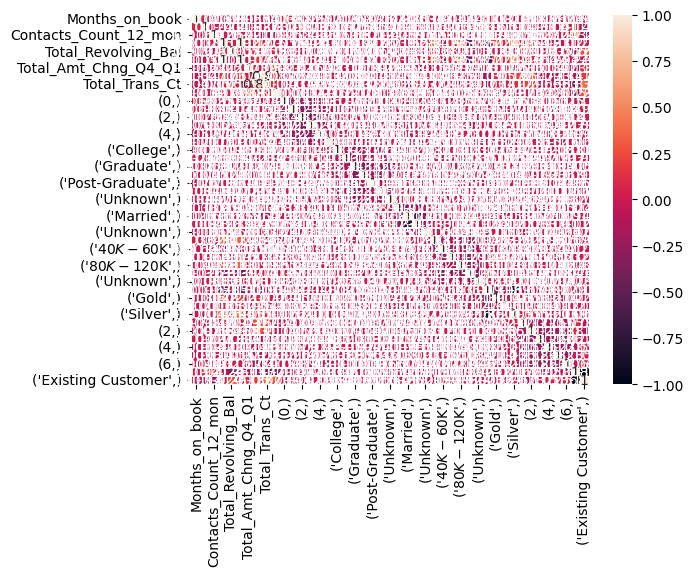

In [190]:
sns.heatmap(corr_mat, annot=True)
plt.show()

## More Analysis- Average Utilization Ratio

In [191]:
full_df['Attrition'] = [1 if x =='Attrited Customer' else 0 for x in full_df['Attrition_Flag']]

In [192]:
# Binning "Average Utilization Ratio"
bins = [-1, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
full_df['Average_Utilization_Ratio_Binned'] = pd.cut(full_df['Avg_Utilization_Ratio'], bins = bins, labels = labels)
full_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Attrition,Average_Utilization_Ratio_Binned
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0,0-10%
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,10-20%
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0,0-10%
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0,70-80%
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0,0-10%


In [193]:
full_df[['Average_Utilization_Ratio_Binned', 'Attrition']].groupby(['Average_Utilization_Ratio_Binned']).mean().sort_values(by='Attrition', ascending=False)

,Attrition
Average_Utilization_Ratio_Binned,
0-10%,0.263755
90-100%,0.216216
80-90%,0.199438
30-40%,0.106383
20-30%,0.097023
10-20%,0.093581
40-50%,0.076006
70-80%,0.070946
50-60%,0.063257
